In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/PETRI_D2D4D23_250117'

In [ ]:
expr = pd.read_csv("holiday_cluster_final_sum.csv",index_col=0).T
expr = expr[['S','L','L_evolved','M','M_evolved']]
expr

,S,L,L_evolved,M,M_evolved
dnaA,154.0,4551.0,1154.0,1442.0,509.0
dnaN,139.0,4543.0,1251.0,1474.0,610.0
SAUSA300_RS00020,11.0,258.0,60.0,98.0,23.0
recF,105.0,4164.0,1080.0,1524.0,572.0
gyrB,241.0,12698.0,3425.0,4669.0,1825.0
...,...,...,...,...,...
SAUSA300_RS15795,3.0,49.0,17.0,23.0,11.0
SAUSA300_RS15905,1.0,65.0,12.0,16.0,7.0
opp-4F,2.0,19.0,2.0,4.0,2.0
SAUSA300_RS08080,12.0,16.0,5.0,7.0,1.0


In [5]:
metadata = pd.DataFrame({'condition': ['S','L','L_evolved','M','M_evolved']},
                       index=['S','L','L_evolved','M','M_evolved'])
metadata

,condition
S,S
L,L
L_evolved,L_evolved
M,M
M_evolved,M_evolved


In [6]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=expr.transpose(),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)
dds

/Users/peien/opt/anaconda3/envs/pydeseq2/lib/python3.8/site-packages/pydeseq2/dds.py:250: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


AnnData object with n_obs × n_vars = 5 × 2507
    obs: 'condition'
    obsm: 'design_matrix'

In [7]:
dds.fit_size_factors()

dds.obsm["size_factors"]

Fitting size factors...
... done in 0.01 seconds.



array([0.29910992, 4.26940057, 1.01885074, 1.51586519, 0.5364923 ])

In [8]:
dds.deseq2() #It's able to get the size factor and normalized counts although with an error

Fitting size factors...
... done in 0.00 seconds.



ValueError: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.

In [9]:
dds

AnnData object with n_obs × n_vars = 5 × 2507
    obs: 'condition'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero'
    layers: 'normed_counts'

In [10]:
exp_avg = pd.DataFrame(dds.layers['normed_counts'], 
                       index=['S','L','L_evolved','M','M_evolved'],
                      columns=expr.index)
exp_avg

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15495,SAUSA300_RS15500,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15725,SAUSA300_RS15795,SAUSA300_RS15905,opp-4F,SAUSA300_RS08080,SAUSA300_RS10575
S,514.860892,464.712104,36.775778,351.041517,805.723864,765.604833,618.501721,223.997921,190.565395,36.775778,...,815.753621,391.160548,40.119031,76.894809,0.000000,10.029758,3.343253,6.686505,40.119031,83.581314
L,1065.957604,1064.083805,60.430029,975.312561,2974.188016,3556.236939,78.699573,28.575440,709.233053,36.773312,...,1.873799,1.639574,5.152948,9.603222,4.918723,11.477021,15.224620,4.450273,3.747599,0.234225
L_evolved,1132.648737,1227.854047,58.889882,1060.017882,3361.630784,3836.675835,99.131302,41.222918,790.105922,31.407937,...,2.944494,0.981498,2.944494,11.777976,6.870486,16.685467,11.777976,1.962996,4.907490,0.981498
M,951.271929,972.381985,64.649549,1005.366449,3080.089206,3467.986497,77.183645,29.686017,668.924921,36.942599,...,3.958136,4.617825,4.617825,9.895339,4.617825,15.172853,10.555028,2.638757,4.617825,0.000000
M_evolved,948.755455,1137.015378,42.871072,1066.184912,3401.726337,3949.730470,72.694426,50.326910,758.631572,27.959395,...,0.000000,3.727919,9.319798,7.455839,3.727919,20.503556,13.047717,3.727919,1.863960,0.000000


In [11]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/PETRI_D2D4D23_250117'

In [ ]:
exp_avg.to_csv("holiday_cluster_final_deseq2_normed_counts.csv")

In [ ]:
exp = pd.read_csv("holiday_cluster_final_deseq2_normed_counts.csv", index_col=0)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15495,SAUSA300_RS15500,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15725,SAUSA300_RS15795,SAUSA300_RS15905,opp-4F,SAUSA300_RS08080,SAUSA300_RS10575
S,514.860892,464.712104,36.775778,351.041517,805.723864,765.604833,618.501721,223.997921,190.565395,36.775778,...,815.753621,391.160548,40.119031,76.894809,0.000000,10.029758,3.343253,6.686505,40.119031,83.581314
L,1065.957604,1064.083805,60.430029,975.312561,2974.188016,3556.236939,78.699573,28.575440,709.233053,36.773312,...,1.873799,1.639574,5.152948,9.603222,4.918723,11.477021,15.224620,4.450273,3.747599,0.234225
L_evolved,1132.648737,1227.854047,58.889882,1060.017882,3361.630784,3836.675835,99.131302,41.222918,790.105922,31.407937,...,2.944494,0.981498,2.944494,11.777976,6.870486,16.685467,11.777976,1.962996,4.907490,0.981498
M,951.271929,972.381985,64.649549,1005.366449,3080.089206,3467.986497,77.183645,29.686017,668.924921,36.942599,...,3.958136,4.617825,4.617825,9.895339,4.617825,15.172853,10.555028,2.638757,4.617825,0.000000
M_evolved,948.755455,1137.015378,42.871072,1066.184912,3401.726337,3949.730470,72.694426,50.326910,758.631572,27.959395,...,0.000000,3.727919,9.319798,7.455839,3.727919,20.503556,13.047717,3.727919,1.863960,0.000000


In [3]:
exp_logscaled = np.log2(exp+1).apply(lambda x: (x - np.mean(x)) / np.std(x), 0)
exp_logscaled

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,SAUSA300_RS15495,SAUSA300_RS15500,SAUSA300_RS15580,SAUSA300_RS15635,SAUSA300_RS15725,SAUSA300_RS15795,SAUSA300_RS15905,opp-4F,SAUSA300_RS08080,SAUSA300_RS10575
S,-1.941379,-1.951777,-1.529529,-1.994020,-1.991516,-1.994302,1.983532,1.923332,-1.988835,0.758710,...,1.944541,1.961282,1.854421,1.973370,-1.949008,-1.370071,-1.942156,1.538430,1.919513,1.978394
L,0.635558,0.403093,0.725049,0.380639,0.366155,0.436923,-0.536022,-0.797308,0.443085,0.758113,...,-0.465494,-0.626326,-0.457986,-0.489465,0.484451,-0.856890,0.870977,0.493507,-0.447385,-0.502304
L_evolved,0.850548,0.810247,0.607313,0.574333,0.587304,0.557129,-0.255620,-0.319965,0.643224,-0.643319,...,-0.330403,-0.774702,-0.999233,-0.259057,0.874488,0.595160,0.361233,-1.358857,-0.207737,-0.224492
M,0.232328,0.146803,1.033083,0.451222,0.429340,0.397128,-0.559617,-0.747884,0.334649,0.799019,...,-0.232841,-0.235511,-0.568749,-0.455901,0.413045,0.223009,0.146492,-0.734454,-0.262859,-0.625799
M_evolved,0.222945,0.591634,-0.835916,0.587825,0.608717,0.603121,-0.632272,-0.058175,0.567877,-1.672523,...,-0.915804,-0.324743,0.171547,-0.768946,0.177024,1.408792,0.563453,0.061374,-1.001532,-0.625799


In [4]:
markers = ['carB','carA','pyrC','pyrF','pyrE','pyrB','pyrP',
           'ssaA','sle1','isaA','pbuX','SAUSA300_RS11810','smpB','fnbA','est','rnr','sdrM','lmrS','ausA','SAUSA300_RS12440',
           'agrB','agrC','purM','purQ','purF','purH','purD','purL','purN','purC','purK']

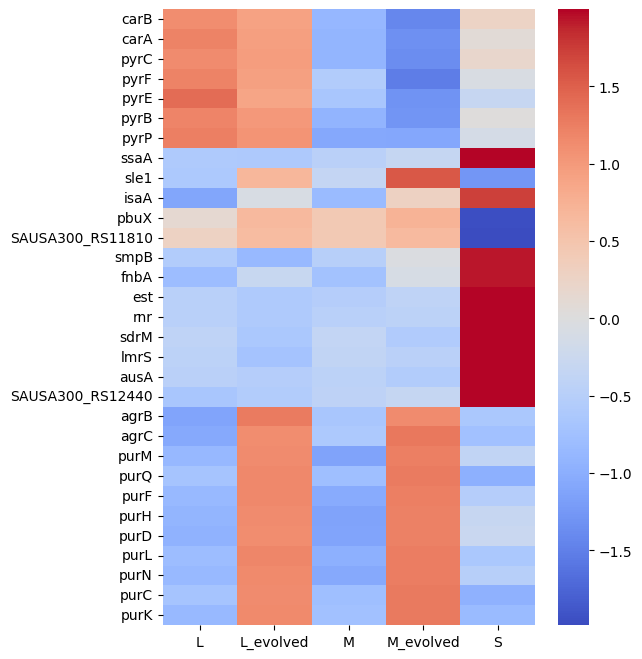

In [5]:
plt.figure(figsize=(6,8))
sns.heatmap(exp_logscaled[markers].T[['L','L_evolved','M','M_evolved','S']], cmap='coolwarm')
plt.savefig("deseq2_holiday_cluster_final_heatmap.pdf")